In [15]:
from tilepy.include.ObservationScheduler import getdate, GetUniversalSchedule
from tilepy.include.PointingTools import ObservationParameters, NextWindowTools
import time
import argparse
import os


In [16]:
# Type of followup, options: gbm, gbmpng or gw
alertType = 'gw'

# The url to the FITS file with the sky localization, e.g.for GW https://urlpath/Bayestar.fits.gz'
skymap = 'https://gracedb.ligo.org/api/superevents/S190728q/files/GW190728_064510_PublicationSamples_flattened.fits.gz,0'

# Date and time of the event in format YYYY-MM-DD HH:MM:SS. You can use 2023-07-15 14:30:10 for the example .fits file
obsTime = getdate("2023-07-27 08:30:10")

# Path to the input datasets (where galaxy cat should be for GW case)
datasetDir = '../../dataset/'

# Path to the output folder
outDir = './output'

# Config file for the tiling scheduling
#cfgFile = '../obsConfig/FollowupParameters.ini'

# Galaxy catalog name (if no catalog is given, the approach will be 2D) only. Path is given in datasetDir 
galcatName = "../../tilepy/dataset/Gladeplus.h5"

# Tiles already observed
pointingsFile = None


In [21]:
ObsArray = ['LST','MAGIC']
parameters = []

In [22]:
# Config file for the tiling scheduling
for i in ObsArray:
    parameters.append("../config/FollowupParameters_%s.ini" % i)
print("===========================================================================================")
print('parameters', parameters)
obsparameters = []

parameters ['../config/FollowupParameters_LST.ini', '../config/FollowupParameters_MAGIC.ini']


In [23]:
for j in range(len(parameters)):
    obspar = ObservationParameters()
    obspar.add_parsed_args(skymap, obsTime, datasetDir, galcatName, outDir, pointingsFile, alertType)
    obspar.from_configfile(parameters[j])
    obsparameters.append(obspar)

it is a url
The filename is  GW190728_064510_PublicationSamples_flattened.fits.gz,0
curl https://gracedb.ligo.org/api/superevents/S190728q/files/GW190728_064510_PublicationSamples_flattened.fits.gz,0 -o GW190728_064510_PublicationSamples_flattened.fits.gz,0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1507k  100 1507k    0     0   645k      0  0:00:02  0:00:02 --:--:--  645k


Is the hotspot in the galactic plane? False
Starting the 2D pointing calculation with the following parameters

Filename:  S190728q
Date:  2023-07-27 08:30:10
Dataset:  ../../dataset/
Output:  ./output/S190728q

obsparameters 2
Loading HEALPix map from file: GW190728_064510_PublicationSamples_flattened.fits.gz,0
Event has triggered  Non specified  => distance = 857.56  +- 192.23  Mpc
The total probability PGW:  0.5698
     Time[UTC]      RA(deg)  DEC(deg)  PGW   Round ObsName Duration FoV
------------------- -------- -------- ------ ----- ------- -------- ---
2023-07-28 01:50:13 313.5938   7.6321 0.0526     1   MAGIC       15 1.0
2023-07-28 01:50:13 313.5938   7.9333 0.1627     1     LST       20 2.5
2023-07-28 02:05:13 317.1094  14.3235 0.0361     1   MAGIC       15 1.0
2023-07-28 02:10:13 316.9336  14.4775 0.1203     1     LST       20 2.5
2023-07-28 02:20:13 315.1758  11.1109 0.0285     1   MAGIC       15 1.0
2023-07-28 02:30:13 312.3633   4.1815 0.0731     1     LST       20 2.5
20

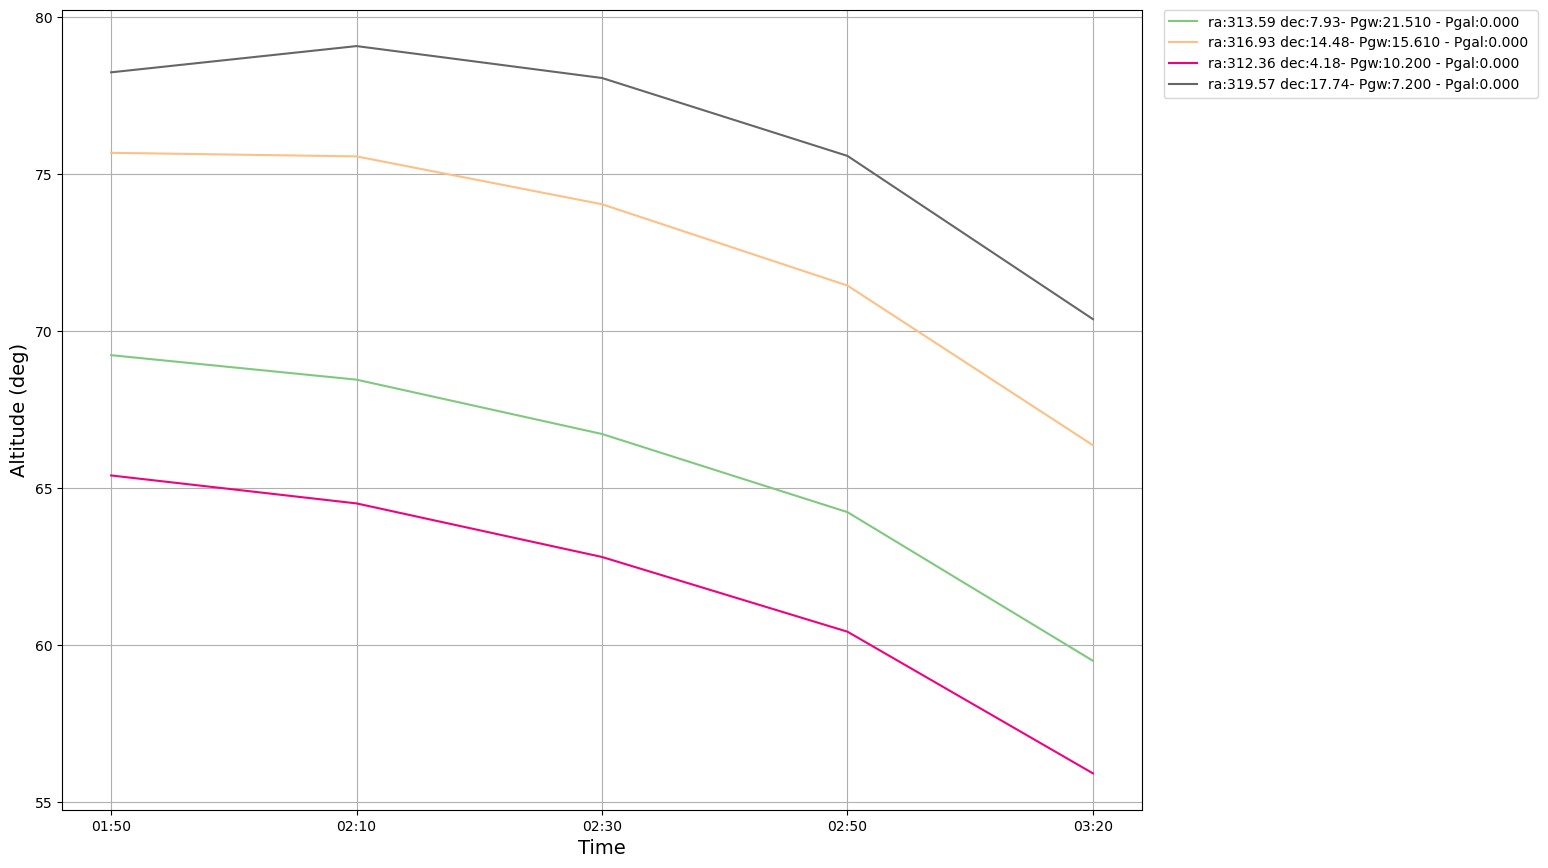

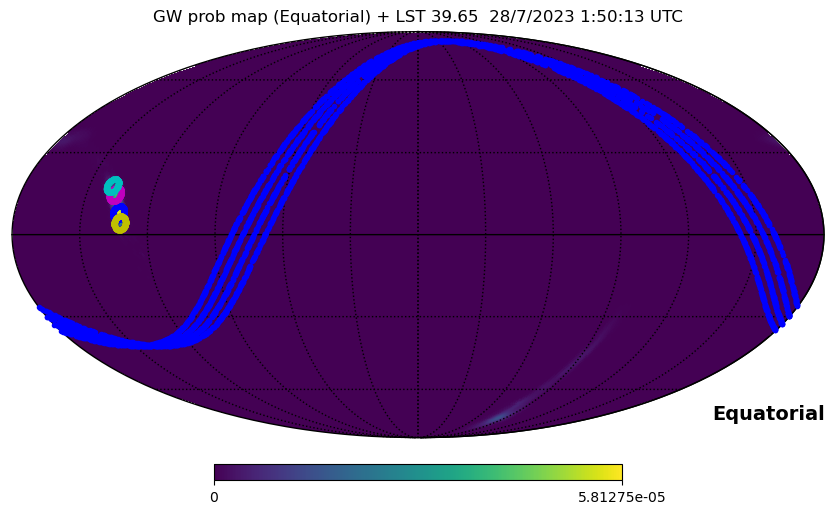

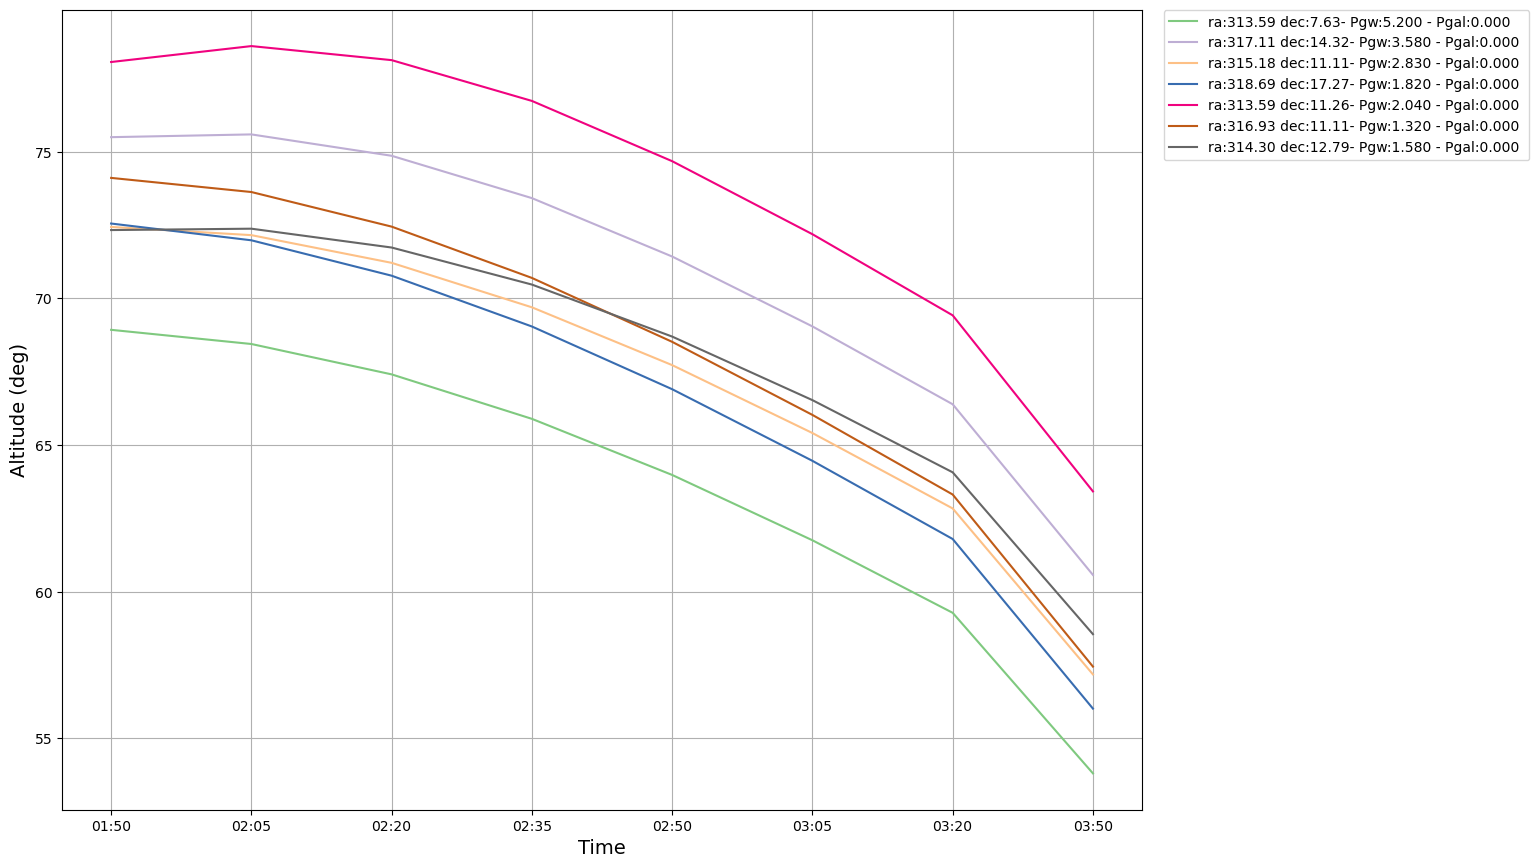

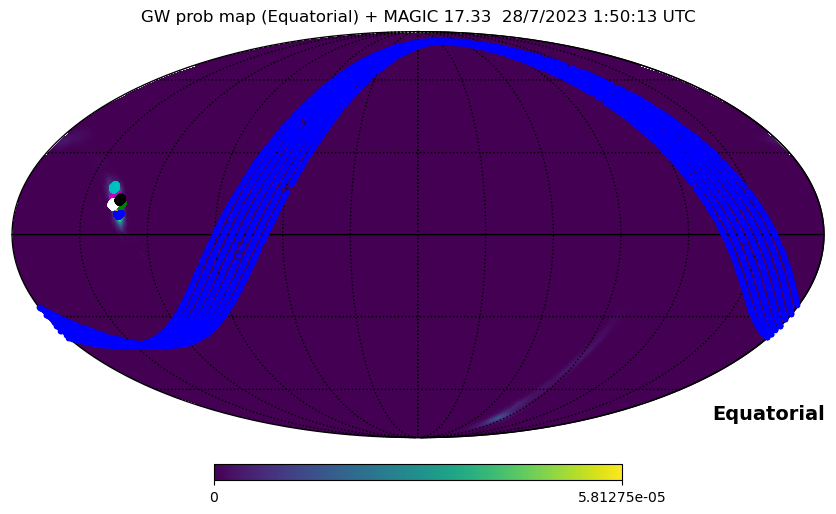

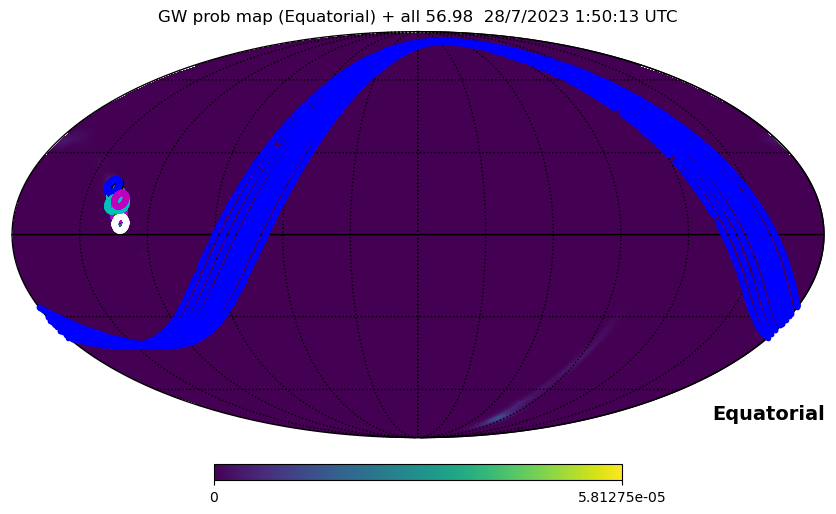

In [24]:
GetUniversalSchedule(obsparameters)